# Look at snow conductivity sensitivity tests

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
import modules.basic_stats as bst
import modules.plotting_module as pltm
import intake
import xarray
import xesmf as xe
import cftime
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
tas_p2 = xr.open_dataset('/home/scrd106/model_output/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Amon/tas//gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p2f1_gn_555001-560012.nc')
tas_cons_01 = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-si-sno-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-si-sno-01/piControl/r1i1p2f1/Amon/tas/gn/v20190429/*.nc')
tas_cons_02 = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-si-sno-02/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-si-sno-02/piControl/r1i1p2f1/Amon/tas/gn/v20190429/*.nc')

In [15]:
len(tas_cons_01.time)/12

186.0

In [16]:
tas_jja_anom_cons_01 = tas_cons_01.groupby("time.season").mean(dim='time').sel(season='JJA')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='JJA')['tas']
tas_jja_anom_cons_02 = tas_cons_02.groupby("time.season").mean(dim='time').sel(season='JJA')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='JJA')['tas']

tas_djf_anom_cons_01 = tas_cons_01.groupby("time.season").mean(dim='time').sel(season='DJF')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='DJF')['tas']
tas_djf_anom_cons_02 = tas_cons_02.groupby("time.season").mean(dim='time').sel(season='DJF')['tas'] - tas_p2.groupby("time.season").mean(dim='time').sel(season='DJF')['tas']

In [17]:
def add_cbar(position, fig, ax, co, size='5%', pad=0.075, **kwargs):
    """
    Adds a colorbar to an axes
    """
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes(position, size=size, pad=pad, axes_class=plt.Axes)
    fig.add_axes(ax_cb)

    if position in ['top', 'bottom']:
        orientation='horizontal'
    if position in  ['right','left']:
        orientation='vertical'
    
    plt.colorbar(co, cax=ax_cb, orientation=orientation, **kwargs)

    if position == 'left':
        ax_cb.yaxis.set_ticks_position('left')
        ax_cb.yaxis.set_label_position('left')

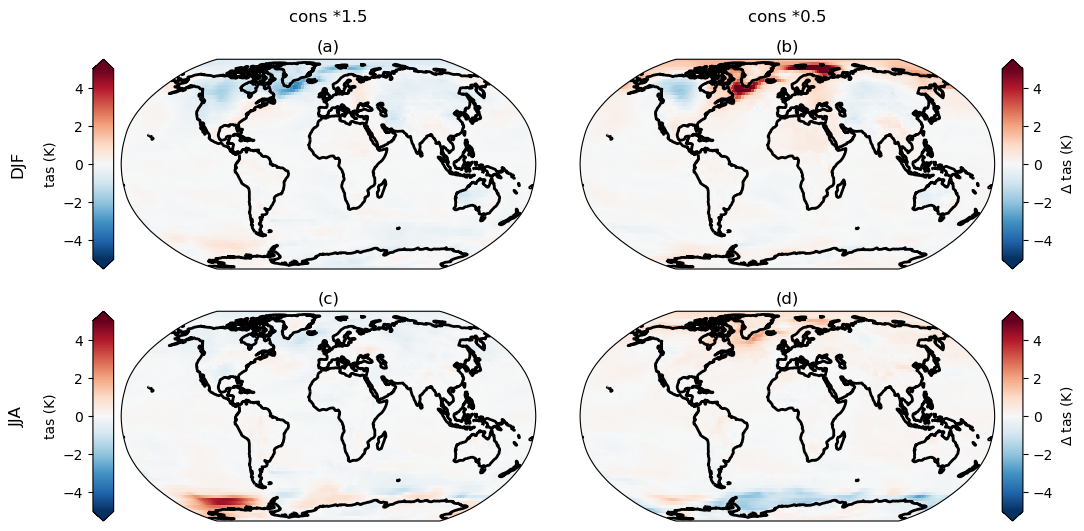

In [18]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

title_fontsize=12

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(tas_djf_anom_cons_01.lon, tas_djf_anom_cons_01.lat, tas_djf_anom_cons_01, cmap=cmap2,vmin=-5, vmax=5,
                        transform=ccrs.PlateCarree(), rasterized=True)
add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'tas (K)')
#ax1.contour(tas_djf_anom_cons_01.lon, tas_djf_anom_cons_01.lat, tas_djf_anom_cons_01, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'cons *1.5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(tas_djf_anom_cons_02.lon, tas_djf_anom_cons_02.lat, tas_djf_anom_cons_02, 
                            cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
#ax3.contour(tas_djf_anom_cons_02.lon, tas_djf_anom_cons_02.lat, tas_djf_anom_cons_02,
#             10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'cons *0.5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(tas_jja_anom_cons_01.lon, tas_jja_anom_cons_01.lat, tas_jja_anom_cons_01, 
                        cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True)
add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'tas (K)')
#ax2.contour(tas_jja_anom_cons_01.lon, tas_jja_anom_cons_01.lat, tas_jja_anom_cons_01,
#            10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(tas_jja_anom_cons_02.lon, tas_jja_anom_cons_02.lat, tas_jja_anom_cons_02,
                         cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
#ax4.contour(tas_jja_anom_cons_02.lon, tas_jja_anom_cons_02.lat, tas_jja_anom_cons_02,
#                     10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines(linewidth=2)